This is Will's edit of a notebook originally written by Javier.

# Correlations between H II region parameters

We look at correlations between 6 principal measurements that fall into two groups: 

* Basic parameters: 
    * Size: $L$
    * Ionizing luminosity: $Q(\mathrm{H})$
    * Distance: $D$
* Velocity structure function parameters:
    * Velocity dispersion on plane of sky: $\sigma$
    * Velocity autocorrelation length scale: $\ell_0$
    * Structure function slope in inertial range: $m$

Colab's markdown renderer seems to have a bug that requires some math outside of a list in order to trigger latex parsing: $\alpha$. 

## Original table from Javier

In [1]:
import time
start_time=time.time()
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import lmfit
import statsmodels.api as sm
import linmix
from scipy.stats import pearsonr
import pickle

In [2]:
Region =["NGC 604","NGC 595","Hubble X","Hubble V","30Dor" ,"Carina","NGC 346","M8"   ,"OrionL","OrionS"]
LHa    =[4.46e39  ,2.29e39  ,3.98e38   ,7.41e38   ,5.74e39 ,3.98e39 ,4.67e38  ,2.95e37,1e37    ,1e37    ]
SFR    =[5.3e-3   ,2.6e-3   ,3.1e-4    ,1.5e-4    ,1.3e-2  ,1.0e-2  ,0.0021   ,1.0e-4 ,5.3e-5  ,5.3e-5  ]
n      =[3        ,4        ,5         ,8         ,250     ,500     ,100      ,60     ,150     ,4000    ] 
Diam   =[400      ,400      ,160       ,130       ,98.9    ,5       ,64       , 25    ,5       ,0.6     ]
R      =[200      ,200      ,80        ,65        ,49.4    ,7.5     ,32       ,12.5   ,2.5     ,0.3     ]
Dist   =[840      ,840      ,500       ,500       ,50      ,2.35    ,61.7     ,1.25   ,0.4     ,0.4     ]
siglos =[16.21    ,18.33    ,12.3      ,13.4      ,31.7    ,22.46   ,10.2     ,13.6   ,6       ,6       ]
sigW   =[23.1     ,27.1     ,13.4      ,14.7      ,31.7    ,22.46   ,10.2     ,13.6   ,6       ,6       ]

In [3]:
samples=pd.read_csv('CIresults//list2.csv',header=None)
samples

,0
0,N604H
1,N595
2,HX
3,HV
4,Dor
5,CarC
6,N346
7,M8
8,OrionLH
9,OrionS


In [4]:
CI = {}

for i in range(len(samples)):
    pickle_in = open('Results//CI' + samples[0][i] + '.pkl',"rb")
    df = pickle.load(pickle_in)
    CI[samples[0][i]] = df

SF = {}

for i in range(len(samples)):
    pickle_in = open('Results//SF' + samples[0][i] + '.pkl',"rb")
    df = pickle.load(pickle_in)
    SF[samples[0][i]] = df

Results

In [5]:
sig = [[0]*(1) for i in range(len(samples))]
siger = [[0]*(1) for i in range(len(samples))]
sig2 = [[0]*(1) for i in range(len(samples))]
sig2er = [[0]*(1) for i in range(len(samples))]
r0 = [[0]*(1) for i in range(len(samples))]
r0er = [[0]*(1) for i in range(len(samples))]
m = [[0]*(1) for i in range(len(samples))]
mer = [[0]*(1) for i in range(len(samples))]
n = [[0]*(1) for i in range(len(samples))]
ner = [[0]*(1) for i in range(len(samples))]
s0 = [[0]*(1) for i in range(len(samples))]
s0er = [[0]*(1) for i in range(len(samples))]

for i in range(len(samples)):
    sig[i] = np.round(CI[samples[0][i]]['result_emcee'].params['sig2'].value,4)**0.5
    siger[i] = np.round(CI[samples[0][i]]['result_emcee'].params['sig2'].stderr,4)**0.5
    sig2[i] = np.round(CI[samples[0][i]]['result_emcee'].params['sig2'].value,4)
    sig2er[i] = np.round(CI[samples[0][i]]['result_emcee'].params['sig2'].stderr,4)
    r0[i] = np.round(CI[samples[0][i]]['result_emcee'].params['r0'].value,4)
    r0er[i] = np.round(CI[samples[0][i]]['result_emcee'].params['r0'].stderr,4)
    m[i] = np.round(CI[samples[0][i]]['result_emcee'].params['m'].value,4)
    mer[i] = np.round(CI[samples[0][i]]['result_emcee'].params['m'].stderr,4)
    n[i] = np.round(CI[samples[0][i]]['result_emcee'].params['noise'].value,4)
    ner[i] = np.round(CI[samples[0][i]]['result_emcee'].params['noise'].stderr,4)
    s0[i] = np.round(CI[samples[0][i]]['result_emcee'].params['s0'].value,4)
    s0er[i] = np.round(CI[samples[0][i]]['result_emcee'].params['s0'].stderr,4)
    

In [6]:
td = pd.DataFrame(
    {
       "A": sig2,
       "DA": sig2er,
       "B": m,
       "DB": mer,
       "C": r0,
       "DC": r0er,
       "E": n,
       "DE": ner,
       "F": s0,
       "DF": s0er,
    },
)

In [7]:
td=td.sort_values( by='A', ascending=False)

In [8]:
td=td.round(decimals=3)
tdx=(td.groupby(td.columns.str[-1], axis=1).apply(lambda x: x.astype(str).apply('$\pm$'.join, 1)))
SFres=tdx[['A','B','C','E','F']].copy()

In [9]:
SFres.rename(columns={'A':'sig2 [km$^2$/s$^2$]','B':'m','C':'r0 [pc]','E':'noise [km$^2$/s$^2$]','F':'seeing [pc]'}, inplace=True)
SFres.insert(loc=0, column='Region', value=samples)
SFres

,Region,sig2 [km$^2$/s$^2$],m,r0 [pc],noise [km$^2$/s$^2$],seeing [pc]
4,Dor,350.878$\pm$21.59,0.841$\pm$0.038,4.603$\pm$0.438,6.193$\pm$0.574,0.163$\pm$0.022
0,N604H,80.934$\pm$25.31,0.822$\pm$0.203,9.125$\pm$2.982,0.4$\pm$0.262,2.18$\pm$1.051
1,N595,56.455$\pm$1.695,1.293$\pm$0.047,11.695$\pm$0.455,1.165$\pm$0.395,0.513$\pm$0.114
6,N346,38.035$\pm$1.098,0.789$\pm$0.026,1.91$\pm$0.098,1.221$\pm$0.305,0.061$\pm$0.013
9,OrionS,16.923$\pm$0.972,1.069$\pm$0.018,0.092$\pm$0.007,0.025$\pm$0.002,0.002$\pm$0.0
5,CarC,16.74$\pm$1.13,1.369$\pm$0.296,0.663$\pm$0.08,5.401$\pm$1.797,0.008$\pm$0.005
2,HX,15.552$\pm$1.508,0.948$\pm$0.125,3.907$\pm$0.289,0.366$\pm$0.157,0.486$\pm$0.201
3,HV,10.46$\pm$0.752,0.736$\pm$0.094,3.424$\pm$0.33,0.12$\pm$0.116,0.468$\pm$0.12
7,M8,7.291$\pm$0.846,1.129$\pm$0.091,1.006$\pm$0.176,0.226$\pm$0.098,0.005$\pm$0.003
8,OrionLH,5.976$\pm$0.587,1.725$\pm$0.241,0.735$\pm$0.172,6.33$\pm$0.269,0.1$\pm$0.056


In [10]:
SFres.to_latex('SFresults.tex', escape=False, caption='Main results.',index=False)

In [11]:
data = pd.DataFrame(
    {
       "Region": Region,
       "LHa": LHa,
       "SFR": SFR,
       "n": n,
       "L [pc]": Diam,
       "R [pc]": R,
       "Dist [kpc]": Dist,
       "sig2 [km/s]": sig2,
       "sig2er": sig2er,
       "sig [km/s]": sig,
       "siger": siger,
       "m": m,
       "mer": mer,
       "r0 [pc]": r0,
       "r0er": r0er,
       "siglos [km/s]": siglos,
      
    },
)

Checar que los tipos de las columnas sean adecuadas:

In [12]:
data.dtypes

Region            object
LHa              float64
SFR              float64
n                float64
L [pc]           float64
R [pc]           float64
Dist [kpc]       float64
sig2 [km/s]      float64
sig2er           float64
sig [km/s]       float64
siger            float64
m                float64
mer              float64
r0 [pc]          float64
r0er             float64
siglos [km/s]    float64
dtype: object

In [13]:
data

,Region,LHa,SFR,n,L [pc],R [pc],Dist [kpc],sig2 [km/s],sig2er,sig [km/s],siger,m,mer,r0 [pc],r0er,siglos [km/s]
0,NGC 604,4.460000e+39,0.005300,0.3996,400.0,200.0,840.00,80.9339,25.3100,8.996327,5.030904,0.8225,0.2033,9.1250,2.9823,16.21
1,NGC 595,2.290000e+39,0.002600,1.1647,400.0,200.0,840.00,56.4551,1.6947,7.513661,1.301806,1.2927,0.0468,11.6951,0.4549,18.33
2,Hubble X,3.980000e+38,0.000310,0.3665,160.0,80.0,500.00,15.5523,1.5078,3.943640,1.227925,0.9485,0.1253,3.9070,0.2892,12.30
3,Hubble V,7.410000e+38,0.000150,0.1204,130.0,65.0,500.00,10.4604,0.7521,3.234254,0.867237,0.7361,0.0938,3.4236,0.3305,13.40
4,30Dor,5.740000e+39,0.013000,6.1932,98.9,49.4,50.00,350.8784,21.5905,18.731748,4.646558,0.8414,0.0377,4.6033,0.4381,31.70
5,Carina,3.980000e+39,0.010000,5.4010,5.0,7.5,2.35,16.7402,1.1302,4.091479,1.063109,1.3687,0.2960,0.6633,0.0800,22.46
6,NGC 346,4.670000e+38,0.002100,1.2209,64.0,32.0,61.70,38.0352,1.0980,6.167268,1.047855,0.7892,0.0261,1.9095,0.0980,10.20
7,M8,2.950000e+37,0.000100,0.2261,25.0,12.5,1.25,7.2912,0.8461,2.700222,0.919837,1.1291,0.0911,1.0060,0.1764,13.60
8,OrionL,1.000000e+37,0.000053,6.3297,5.0,2.5,0.40,5.9756,0.5874,2.444504,0.766420,1.7252,0.2408,0.7348,0.1716,6.00
9,OrionS,1.000000e+37,0.000053,0.0252,0.6,0.3,0.40,16.9233,0.9716,4.113794,0.985698,1.0692,0.0178,0.0919,0.0066,6.00


## Change to log scale for most parameters

El analisis de la mayoría de las columnas sería mejor en escala logarítmica porque varían por varios ordenes de magnitud.  Entonces, hacemos una nueva versión de la tabla así. Dejamos la $m$ en escala lineal porque no varía mucho.

In [14]:
cols = data.columns
logdata = data.copy()
for col in cols:
    if col not in ["Region", "m", "mer", "r0er", "siger",  "sig2er",]:
        logdata[col] = np.round(np.log10(logdata[col]), 2)
        logdata.rename(columns={col: f"log {col}"}, inplace=True)
# Some minor changes to column names
logdata.rename(
    columns={
        "log LHa": "log L(H) [erg s^-1]",
        }, 
    inplace=True)
logdata

,Region,log L(H) [erg s^-1],log SFR,log n,log L [pc],log R [pc],log Dist [kpc],log sig2 [km/s],sig2er,log sig [km/s],siger,m,mer,log r0 [pc],r0er,log siglos [km/s]
0,NGC 604,39.65,-2.28,-0.40,2.60,2.30,2.92,1.91,25.3100,0.95,5.030904,0.8225,0.2033,0.96,2.9823,1.21
1,NGC 595,39.36,-2.59,0.07,2.60,2.30,2.92,1.75,1.6947,0.88,1.301806,1.2927,0.0468,1.07,0.4549,1.26
2,Hubble X,38.60,-3.51,-0.44,2.20,1.90,2.70,1.19,1.5078,0.60,1.227925,0.9485,0.1253,0.59,0.2892,1.09
3,Hubble V,38.87,-3.82,-0.92,2.11,1.81,2.70,1.02,0.7521,0.51,0.867237,0.7361,0.0938,0.53,0.3305,1.13
4,30Dor,39.76,-1.89,0.79,2.00,1.69,1.70,2.55,21.5905,1.27,4.646558,0.8414,0.0377,0.66,0.4381,1.50
5,Carina,39.60,-2.00,0.73,0.70,0.88,0.37,1.22,1.1302,0.61,1.063109,1.3687,0.2960,-0.18,0.0800,1.35
6,NGC 346,38.67,-2.68,0.09,1.81,1.51,1.79,1.58,1.0980,0.79,1.047855,0.7892,0.0261,0.28,0.0980,1.01
7,M8,37.47,-4.00,-0.65,1.40,1.10,0.10,0.86,0.8461,0.43,0.919837,1.1291,0.0911,0.00,0.1764,1.13
8,OrionL,37.00,-4.28,0.80,0.70,0.40,-0.40,0.78,0.5874,0.39,0.766420,1.7252,0.2408,-0.13,0.1716,0.78
9,OrionS,37.00,-4.28,-1.60,-0.22,-0.52,-0.40,1.23,0.9716,0.61,0.985698,1.0692,0.0178,-1.04,0.0066,0.78


Uncertainties Log Space

In [15]:
logdata['mer']=(data['mer']/data['m'])*0.434

In [16]:
logdata['r0er']=(data['r0er']/data['r0 [pc]'])*0.434

In [17]:
logdata['siger']=(data['siger']/data['sig [km/s]'])*0.434

In [18]:
logdata['sig2er']=(data['sig2er']/data['sig2 [km/s]'])*0.434

Make the label text bigger on the figures

In [19]:
sns.set_context("talk")

Repeat the pair plot of correlations between columns with the log-scale quantities. Use color to indicate the distance to the regions.

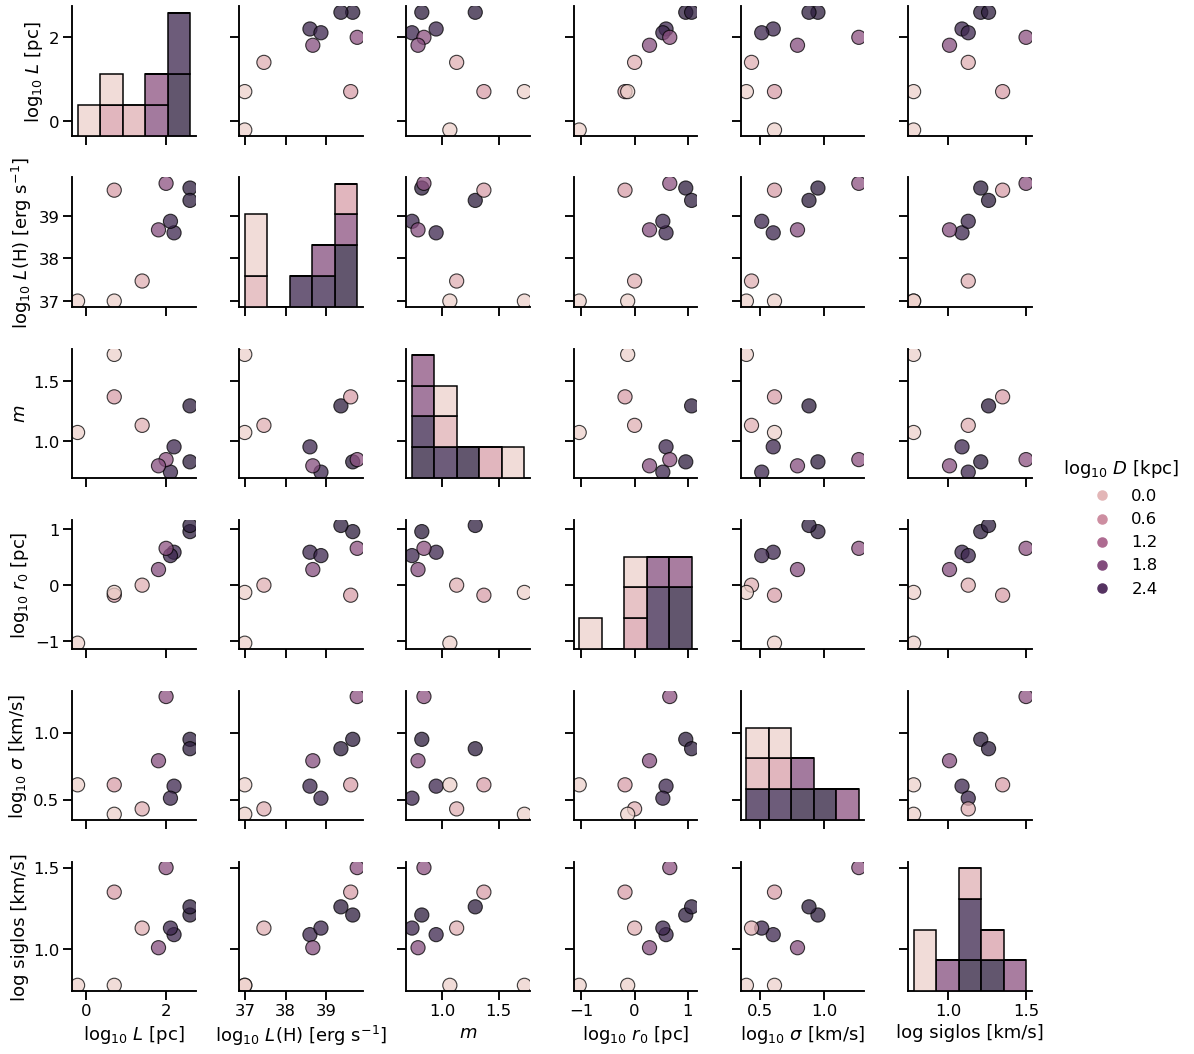

In [20]:
selected_vars = [ "log L [pc]","log L(H) [erg s^-1]", "log Dist [kpc]", "m", "log r0 [pc]", "log sig [km/s]", "log siglos [km/s]"]
plotdata = logdata[selected_vars].rename(
    columns={
        # Switch column names to use latex formatting to improve axis labels
        "log L [pc]": r"$\log_{10}\ L$ [pc]", 
        "log L(H) [erg s^-1]": r"$\log_{10}\ L(\mathrm{H})$ [erg s$^{-1}$]", 
        "m": "$m$", 
        "log r0 [pc]": r"$\log_{10}\ r_0$ [pc]", 
        "log sig [km/s]": r"$\log_{10}\ \sigma$ [km/s]", 
        "log Dist [kpc]": r"$\log_{10}\ D$ [kpc]",
    },
)

sns.pairplot(plotdata, 
             hue=r"$\log_{10}\ D$ [kpc]",
             plot_kws=dict(alpha=0.75, s=200, edgecolor="k"), 
             diag_kind='hist',
             diag_kws= dict(multiple='stack'),
             );

figname = "strucfunc-correlations"
# Save PDF and JPG versions of the figure
#plt.gcf().savefig(f"{figname}.pdf")
#plt.gcf().savefig(f"{figname}.jpg")

## Correlation coefficients

Calculate [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), $r$, between each pair of variables:

In [21]:
logdata[selected_vars].corr()

,log L [pc],log L(H) [erg s^-1],log Dist [kpc],m,log r0 [pc],log sig [km/s],log siglos [km/s]
log L [pc],1.000000,0.674686,0.923364,-0.488579,0.978519,0.484508,0.555372
log L(H) [erg s^-1],0.674686,1.000000,0.714755,-0.418896,0.724332,0.711118,0.875549
log Dist [kpc],0.923364,0.714755,1.000000,-0.601485,0.888121,0.484911,0.477683
m,-0.488579,-0.418896,-0.601485,1.000000,-0.347830,-0.454012,-0.309557
log r0 [pc],0.978519,0.724332,0.888121,-0.347830,1.000000,0.528864,0.608116
log sig [km/s],0.484508,0.711118,0.484911,-0.454012,0.528864,1.000000,0.661643
log siglos [km/s],0.555372,0.875549,0.477683,-0.309557,0.608116,0.661643,1.000000


So the results for correlations between the basic parameters are what we would expect:

- Size is moderately correlated with luminosity ($r = 0.67$).  The correlation is only weak because size will also depend on ambient density and the age of the region. 
- Size is highly correlated with distance ($r = 0.92$).  This is just a selection effect due to the fact that we tend to choose regions that have an angular size that matches our instruments. 
- Luminosity–distance correlation is the weakest ($r = 0.71$), and can be explained as being due to the previous two.



The correlations of the structure function parameters with the basic parameters are very interesting:
- Autocorrelation length scale, $r_0$, is *highly* correlated ($r = 0.96$) with region size, $L$.  Looking at the graph, the relation seems to be approximately linear with $\ell_0 \approx 0.1 L$.  How much of this correlation is real and how much is down to selection effects is something we need to consider carefully.
- Velocity dispersion, $\sigma$, is well correlated ($r = 0.71$) with luminosity, $L(\mathrm{Ha})$.  
- The structure function slope $m$ is well correlated ($r = 0.73$) with distance.  This is mainly because $m \approx 1.6$ for all the distant regions observed with TAURUS and ISIS, but is around $m = 1$ for all the nearby regions.  I suspect that this is mainly a data quality issue: we observe very little of the inertial range in the distant regions, so the determination of $m$ is probably not so reliable.  But I am not sure why this would tend to bias $m$ towards high values.  

## Significance tests

We can calculate the statistical significance of the correlations by using the Student t-statistic.  We test the null hypothesis that a given pair of variables is truly uncorrelated ($r = 0$) for the underlying population and that the observed $r$ for our sample of $N = 9$ sources arises solely by chance.  We want to calculate the $p$-value, which is the probability of obtaining $r$ greater than or equal to the observed value, given that there is no true correlation.  A small value of $p$ means that the null hypothesis can be rejected at a certain confidence level.  

First we calculate the t-statistic from the Pearson correlation coefficient:
$$
t = r \, \left(\frac{N - 2}{1 - r^2}\right)^{1/2}
$$
Then, we use the cumulative distribution function (CDF) of the t-distribution with $N - 1$ degrees of freedom to find the p-value. 

In [22]:
def tstatistic(r, n):
    """Compute Student t statistic for null hypothesis of no correlation
    for an observed Pearson correlation of `r` from `n` samples
    """
    return r*np.sqrt((n - 2) / (1 - r**2))

In [23]:
import scipy.stats

In [24]:
def p_from_t(t, n):
    """Compute 1-sided p-value from Student statistic `t` with `n` observations"""
    # sf is survival function: 1 - CDF
    return scipy.stats.t.sf(t, n-1)
    

In [25]:
N = 9
rvals = np.array([0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.779, 0.8, 0.9, 0.908, 0.95, 0.981])
tvals = tstatistic(rvals, N)
pvals = p_from_t(tvals, N)
pd.DataFrame(
    {"r": rvals, "t": tvals, "p": pvals}
)

,r,t,p
0,0.000,0.000000,5.000000e-01
1,0.200,0.540062,3.019294e-01
2,0.400,1.154701,1.407685e-01
3,0.500,1.527525,8.257494e-02
4,0.600,1.984313,4.124805e-02
5,0.700,2.593355,1.597303e-02
6,0.779,3.287020,5.535582e-03
7,0.800,3.527668,3.879201e-03
8,0.900,5.462793,2.997718e-04
9,0.908,5.733922,2.184923e-04


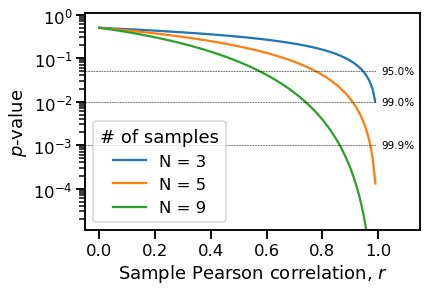

In [26]:
fig, ax = plt.subplots()
for N in 3, 5, 9:
    rvals = np.linspace(0.0, 1.0, 100, endpoint=False)
    tvals = tstatistic(rvals, N)
    pvals = p_from_t(tvals, N)
    ax.plot(rvals, pvals, label=f"N = {N}")
for p0 in 0.05, 0.01, 0.001:
    ax.axhline(p0, color="k", ls="--", lw=0.5)
    ax.text(1.07, p0, f"{100*(1-p0):.1f}%", 
            va="center", ha="center", fontsize="xx-small", 
            bbox={"color": "w"})
ax.legend(title="# of samples")
ax.set(
    xlabel="Sample Pearson correlation, $r$",
    ylabel="$p$-value",
    yscale="log",
    xlim=[-0.05, 1.15],
    ylim=[1.1e-5, 1.1],
);

I have marked confidence levels for nominal $p$-values of 0.05, 0.01, and 0.001, which are often used to judge significance.   This implies that all the correlations that we listed above are highly significant.  For instance, the correlation of $\sigma$ with luminosity, with $r=0.77$, has $p = 0.011$, so close to the 99% confidence level. 

Despite the good correlation, there is a factor of 4 difference in $\sigma$ between Carina and 30~Dor, despite similar luminosities.  **Need to check these luminostiy values**. 

In [27]:
logdata

,Region,log L(H) [erg s^-1],log SFR,log n,log L [pc],log R [pc],log Dist [kpc],log sig2 [km/s],sig2er,log sig [km/s],siger,m,mer,log r0 [pc],r0er,log siglos [km/s]
0,NGC 604,39.65,-2.28,-0.40,2.60,2.30,2.92,1.91,0.135722,0.95,0.242700,0.8225,0.107273,0.96,0.141843,1.21
1,NGC 595,39.36,-2.59,0.07,2.60,2.30,2.92,1.75,0.013028,0.88,0.075194,1.2927,0.015712,1.07,0.016881,1.26
2,Hubble X,38.60,-3.51,-0.44,2.20,1.90,2.70,1.19,0.042076,0.60,0.135134,0.9485,0.057333,0.59,0.032125,1.09
3,Hubble V,38.87,-3.82,-0.92,2.11,1.81,2.70,1.02,0.031204,0.51,0.116373,0.7361,0.055304,0.53,0.041897,1.13
4,30Dor,39.76,-1.89,0.79,2.00,1.69,1.70,2.55,0.026705,1.27,0.107657,0.8414,0.019446,0.66,0.041304,1.50
5,Carina,39.60,-2.00,0.73,0.70,0.88,0.37,1.22,0.029301,0.61,0.112768,1.3687,0.093858,-0.18,0.052344,1.35
6,NGC 346,38.67,-2.68,0.09,1.81,1.51,1.79,1.58,0.012529,0.79,0.073739,0.7892,0.014353,0.28,0.022274,1.01
7,M8,37.47,-4.00,-0.65,1.40,1.10,0.10,0.86,0.050363,0.43,0.147843,1.1291,0.035017,0.00,0.076101,1.13
8,OrionL,37.00,-4.28,0.80,0.70,0.40,-0.40,0.78,0.042662,0.39,0.136071,1.7252,0.060577,-0.13,0.101353,0.78
9,OrionS,37.00,-4.28,-1.60,-0.22,-0.52,-0.40,1.23,0.024917,0.61,0.103990,1.0692,0.007225,-1.04,0.031169,0.78


In [28]:
#logdata=logdata.drop(9, axis=0)
#logdata

r0 vs m

In [29]:
X, Xe, Y, Ye = [logdata[_] for _ in ['log r0 [pc]', 'r0er','m', 'mer']]

In [30]:
Y=np.log10(Y)

[Text(0, 0.5, 'log$ m$'), Text(0.5, 0, 'log$ r_{0}$ [pc]')]

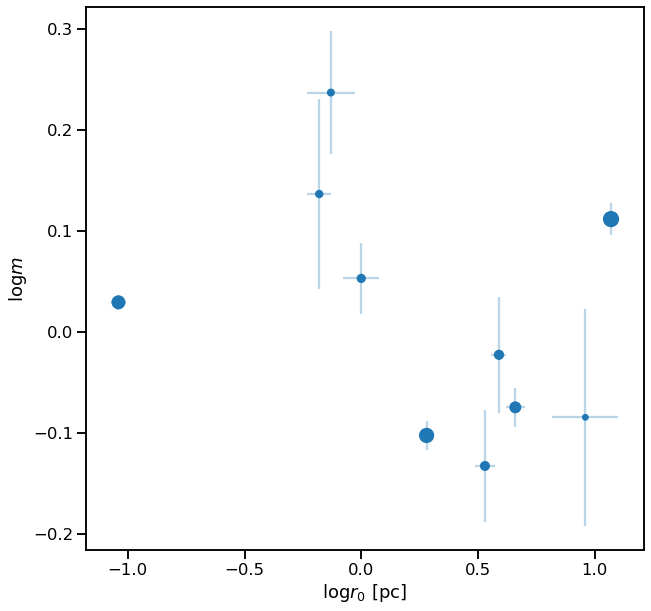

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
    xlabel=r"log$ r_{0}$ [pc]", ylabel=r"log$ m$",
)
#ax.set_aspect("equal")
#sns.despine()

In [32]:
lm = linmix.LinMix(X, Y, Xe, Ye, K=2)

In [33]:
lm.run_mcmc()


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00441657 0.99334358 1.01591671 1.05152653 1.00163557 0.99719286]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.0077783  1.00377609 1.01584365 1.03054685 1.00096201 1.00655034]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00422636 1.00787383 1.01726226 1.02527484 1.00031911 1.0086517 ]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00112278 1.00590876 1.01224001 1.01545793 1.00043989 1.00634849]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00012313 1.00204828 1.00809938 1.01556088 0.99991312 1.00355782]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99926512 1.00139612 1


Iteration:  4900
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99984891 0.99986617 1.00042572 0.99994106 1.00006713 0.9998806 ]

Iteration:  5000
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99985966 0.99985549 1.00043032 0.99995228 1.00006405 0.99987978]


In [34]:
dfchain = pd.DataFrame.from_records(
    lm.chain.tolist(), 
    columns=lm.chain.dtype.names
)
dfchain

,alpha,beta,sigsqr,pi,mu,tausqr,mu0,usqr,wsqr,ximean,xisig,corr
0,0.020773,-0.192275,0.015431,"[0.2767480801648461, 0.7232519198351538]","[0.24424343024980755, 0.3067788756774045]","[0.490831678950975, 0.0958228441364974]",-0.141181,0.272401,0.334310,0.289472,0.453788,-0.574779
1,-0.022903,-0.130880,0.012677,"[0.14837045750624003, 0.8516295424937599]","[0.07135690033080148, 0.32389081253710394]","[0.36786756441067525, 0.27076322026583954]",-0.515068,0.264865,0.200106,0.286422,0.541506,-0.532708
2,0.003837,-0.108892,0.071158,"[0.2769764485570157, 0.7230235514429845]","[-0.592409368654863, 0.05834410048850089]","[0.2003764516119411, 0.3759994291476679]",-0.422853,0.237787,0.215493,-0.121899,0.641999,-0.253509
3,0.175267,-0.396385,0.036694,"[0.03653934106532316, 0.9634606589346767]","[-1.7003603007057682, -0.07847237265426854]","[0.4499554580343205, 0.7096194065793154]",-0.810412,0.275568,0.847429,-0.137735,0.890358,-0.878885
4,0.005216,0.008967,0.011587,"[0.12364477947074154, 0.8763552205292584]","[-1.6858442156267044, 0.20982601326040903]","[0.21467929481755102, 0.6314663547844064]",-0.853937,0.482247,0.709322,-0.024564,0.984540,0.081741
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.011628,-0.049796,0.012024,"[0.3278040655459182, 0.6721959344540819]","[0.5941261502348569, 0.5862650707390447]","[0.13437920165257042, 0.6921206750207549]",0.581297,0.097322,0.222522,0.588842,0.713656,-0.308300
9996,0.065838,-0.157080,0.023281,"[0.5907282468572262, 0.4092717531427737]","[0.6633489522085156, 0.10991388164561111]","[0.07673423377372261, 1.27174528789458]",0.437618,0.120869,0.046620,0.436844,0.799919,-0.635693
9997,0.074764,-0.083209,0.014139,"[0.493281521838744, 0.5067184781612561]","[0.7632880795301921, -0.2401220846475845]","[0.03980188359057211, 0.15947054333972532]",0.003926,0.541044,0.413974,0.254842,0.593382,-0.383486
9998,-0.014579,-0.044598,0.013117,"[0.63835239062494, 0.3616476093750601]","[0.7155655309659347, -0.5496621179944771]","[0.29124857932409703, 0.21679220252857495]",-0.465322,0.348398,0.795945,0.257999,0.796166,-0.296117


In [35]:
dfchain.describe()

,alpha,beta,sigsqr,mu0,usqr,wsqr,ximean,xisig,corr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.027304,-0.055613,0.027167,0.266866,0.257447,0.508441,0.286454,1.010505,-0.247498
std,0.060449,0.091758,0.032287,0.489470,0.161598,0.495021,0.241393,6.391257,0.353890
min,-0.499627,-0.574139,0.002005,-2.078516,0.002265,0.000508,-0.806695,0.322998,-0.999984
25%,-0.008279,-0.107018,0.012515,-0.025013,0.118962,0.179155,0.138323,0.605584,-0.510314
50%,0.025944,-0.054329,0.019513,0.278483,0.233993,0.360811,0.288098,0.729357,-0.282057
75%,0.062234,-0.003085,0.031508,0.565252,0.384799,0.667446,0.435764,0.916346,-0.016451
max,0.393818,0.839439,1.347884,2.739650,0.598263,5.102831,1.525380,595.670069,0.999852


In [36]:
pearsonr(X, Y)

(-0.366523237675038, 0.29753551711315485)

In [37]:
pd.DataFrame({"X": X, "Xe": Xe, "Y": Y, "Ye": Ye}).describe()

,X,Xe,Y,Ye
count,10.000000,10.000000,10.000000,10.000000
mean,0.274000,0.055729,0.014774,0.046610
std,0.631545,0.039598,0.120267,0.034507
min,-1.040000,0.016881,-0.133063,0.007225
25%,-0.097500,0.031408,-0.082397,0.016646
50%,0.405000,0.041600,0.003048,0.045160
75%,0.642500,0.070162,0.096806,0.059766
max,1.070000,0.141843,0.236839,0.107273


[Text(0, 0.5, 'log$ m$'), Text(0.5, 0, 'log$ r_{0}$ [pc]')]

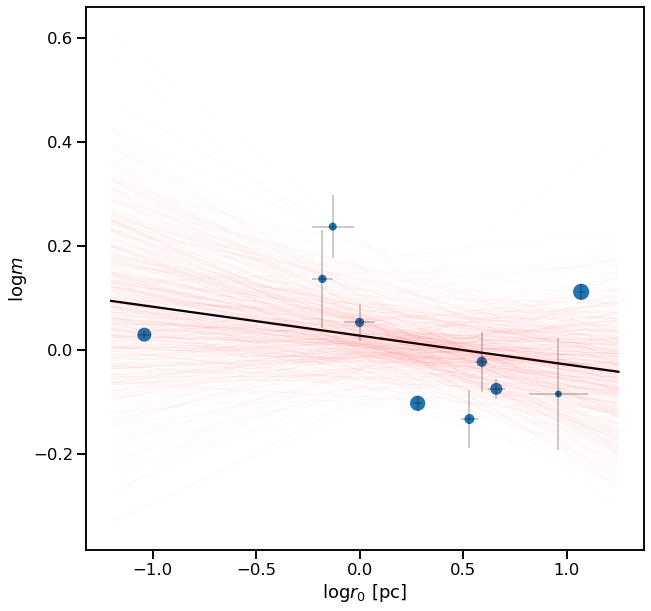

In [38]:
vmin, vmax = -1.2, 1.25
xgrid = np.linspace(vmin, vmax, 200)


fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", elinewidth=0.4, alpha=1.0, c="k")
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
# The original fit
ax.plot(xgrid, dfchain["alpha"].mean() + xgrid*dfchain["beta"].mean(), 
        '-', c="k")
for samp in lm.chain[::20]:
    ax.plot(xgrid, samp["alpha"] + xgrid*samp["beta"], 
        '-', c="r", alpha=0.2, lw=0.1)
    
ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
    xlabel=r"log$ r_{0}$ [pc]", ylabel=r"log$ m$",
)

In [39]:
dfchain["alpha"].mean(),dfchain["beta"].mean()

(0.027304031448612716, -0.055613109274825163)

In [40]:
dfchain["alpha"].std(),dfchain["beta"].std()

(0.06044864847203985, 0.0917578390804127)

In [41]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      m   R-squared:                       0.021
Model:                            WLS   Adj. R-squared:                 -0.101
Method:                 Least Squares   F-statistic:                    0.1727
Date:                Wed, 10 Nov 2021   Prob (F-statistic):              0.689
Time:                        17:06:07   Log-Likelihood:                 6.0007
No. Observations:                  10   AIC:                            -8.001
Df Residuals:                       8   BIC:                            -7.396
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0071      0.026      0.268      

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


r0 vs sig

In [42]:
X, Xe, Y, Ye = [logdata[_] for _ in ['log r0 [pc]', 'r0er','log sig [km/s]', 'siger']]

[Text(0, 0.5, 'log sig [km/s]'), Text(0.5, 0, 'log$ r_{0}$ [pc]')]

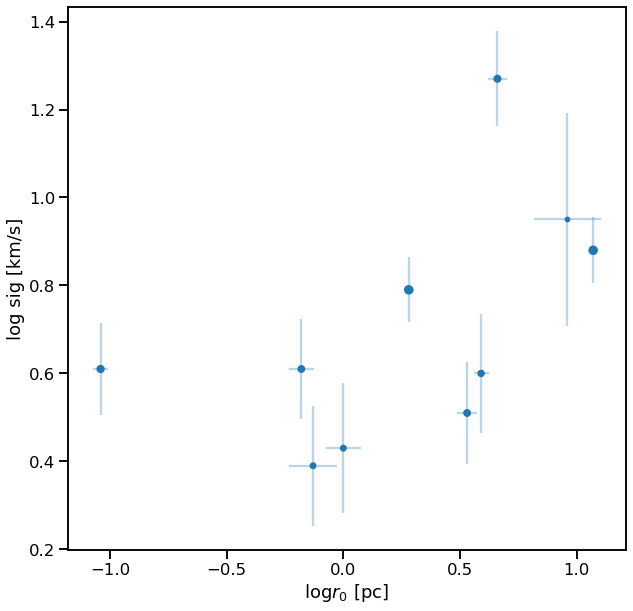

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
    xlabel=r"log$ r_{0}$ [pc]", ylabel=r"log sig [km/s]",
)
#ax.set_aspect("equal")
#sns.despine()

In [44]:
lm = linmix.LinMix(X, Y, Xe, Ye, K=2)

In [45]:
lm.run_mcmc()


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.01042428 1.00896649 1.01960154 1.00996876 0.99406841 1.01301147]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00890849 1.00850475 1.00845576 1.01044974 1.00022851 1.01333929]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00107391 1.00322174 1.00195622 1.01261367 1.00068945 1.00337588]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00137359 1.0008344  1.00034865 1.01125896 0.99909831 1.0025352 ]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00062767 0.99989071 1.00073796 1.00615695 0.99857033 1.00162103]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00194308 0.99942251 1


Iteration:  4900
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00000126 0.99987049 1.00096359 1.00006525 0.99994317 1.00046231]

Iteration:  5000
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00001842 0.99992206 1.00066328 1.00009805 0.99994561 1.00045018]


In [46]:
dfchain = pd.DataFrame.from_records(
    lm.chain.tolist(), 
    columns=lm.chain.dtype.names
)
dfchain

,alpha,beta,sigsqr,pi,mu,tausqr,mu0,usqr,wsqr,ximean,xisig,corr
0,0.749348,0.033028,0.114319,"[0.1334093049485468, 0.8665906950514531]","[0.3853108768260596, 0.816437120782907]","[0.8279998534597304, 0.24047475500574883]",1.037199,0.206804,0.478385,0.758921,0.583391,0.056896
1,0.503295,0.243487,0.079141,"[0.17682914540538974, 0.8231708545946101]","[0.92798245378157, 0.41284333638066656]","[1.8780043684094354, 0.3011279228282832]",0.563689,0.231995,0.951648,0.503935,0.786507,0.562724
2,0.626317,0.487698,0.057829,"[0.16709591794437312, 0.8329040820556269]","[1.3024982822373188, 0.5620348777464141]","[10.668897564697525, 0.5213382576070846]",1.295115,0.218965,1.034074,0.685763,1.514352,0.950864
3,0.784996,0.082483,0.028730,"[0.08827177517856277, 0.9117282248214372]","[0.9740779729310229, 0.02409832230628778]","[0.28340607478363017, 0.20601665054043555]",0.457094,0.491280,0.411521,0.107955,0.534301,0.251638
4,0.668729,0.194566,0.023171,"[0.19672071994894968, 0.8032792800510503]","[1.3374967464455314, 0.5897816197832926]","[0.2826131341765742, 0.22935802349411266]",-0.197348,0.356093,0.588009,0.736873,0.572871,0.590784
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.676506,0.064035,0.008881,"[0.5885551103238196, 0.41144488967618054]","[0.6444940701792687, 0.23599645620452647]","[0.11886573547449647, 0.443916893078642]",0.616448,0.131920,0.174564,0.476420,0.541309,0.345208
9996,0.683010,0.115891,0.078067,"[0.37064712289181334, 0.6293528771081867]","[0.40749282691997457, 0.08027199245742431]","[0.09989592029898665, 0.20389031960115173]",-0.031786,0.092849,0.142840,0.201555,0.436259,0.178060
9997,0.603831,-0.072839,0.071483,"[0.3068677726919957, 0.6931322273080042]","[0.44387600182945325, -0.14319809114563636]","[0.15396706522469616, 0.20977464188095404]",0.073485,0.325721,1.127624,0.036956,0.515711,-0.139132
9998,0.759409,0.326993,0.137860,"[0.4532039482841217, 0.5467960517158784]","[0.4586153394027603, -0.10164797474708781]","[0.8212497651430246, 0.5155810671940457]",-0.035229,0.278747,0.146920,0.152266,0.855510,0.601753


In [47]:
dfchain.describe()

,alpha,beta,sigsqr,mu0,usqr,wsqr,ximean,xisig,corr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.649772,0.217980,0.108135,0.257795,0.265436,0.531544,0.280529,0.951490,0.454081
std,0.121060,0.186724,0.117949,0.494402,0.162433,0.516386,0.244936,2.831922,0.324791
min,-0.242006,-1.598066,0.003260,-2.081620,0.001001,0.000787,-0.884499,0.287695,-0.970476
25%,0.579071,0.109949,0.048187,-0.035756,0.126604,0.187127,0.129296,0.609140,0.269087
50%,0.648963,0.218051,0.077378,0.260631,0.246769,0.376394,0.285943,0.732825,0.508782
75%,0.720513,0.327943,0.130113,0.554405,0.395181,0.701160,0.429341,0.918991,0.698225
max,1.734572,1.654239,3.664318,3.068581,0.598270,5.841241,2.459611,233.367605,0.999997


In [48]:
pearsonr(X, Y)

(0.5288642238626727, 0.11600243772479618)

In [49]:
pd.DataFrame({"X": X, "Xe": Xe, "Y": Y, "Ye": Ye}).describe()

,X,Xe,Y,Ye
count,10.000000,10.000000,10.000000,10.000000
mean,0.274000,0.055729,0.704000,0.125147
std,0.631545,0.039598,0.270604,0.047929
min,-1.040000,0.016881,0.390000,0.073739
25%,-0.097500,0.031408,0.532500,0.104907
50%,0.405000,0.041600,0.610000,0.114571
75%,0.642500,0.070162,0.857500,0.135837
max,1.070000,0.141843,1.270000,0.242700


[Text(0, 0.5, 'log sig [km/s]'), Text(0.5, 0, 'log$ r_{0}$ [pc]')]

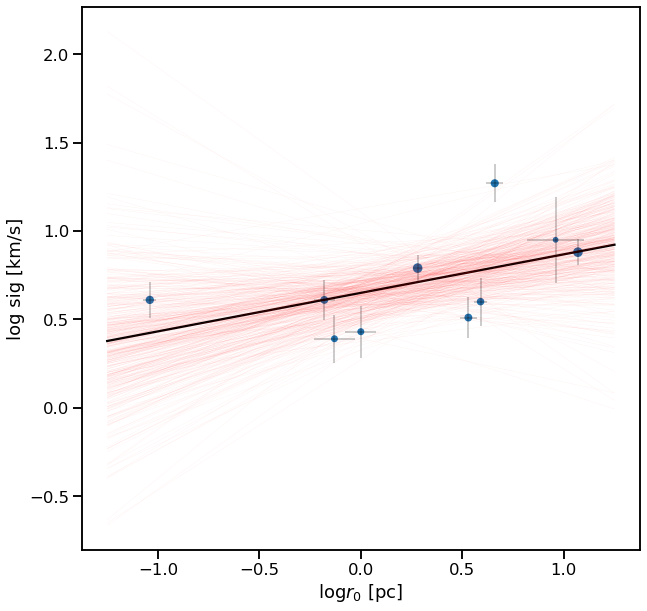

In [50]:
vmin, vmax = -1.25, 1.25
xgrid = np.linspace(vmin, vmax, 200)


fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", elinewidth=0.4, alpha=1.0, c="k")
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
# The original fit
ax.plot(xgrid, dfchain["alpha"].mean() + xgrid*dfchain["beta"].mean(), 
        '-', c="k")
for samp in lm.chain[::20]:
    ax.plot(xgrid, samp["alpha"] + xgrid*samp["beta"], 
        '-', c="r", alpha=0.2, lw=0.1)

    
ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
    xlabel=r"log$ r_{0}$ [pc]", ylabel=r"log sig [km/s]",
)

In [51]:
dfchain["alpha"].mean(),dfchain["beta"].mean()

(0.6497722102274264, 0.2179797616101741)

In [52]:
dfchain["alpha"].std(),dfchain["beta"].std()

(0.12105985063361134, 0.18672437479410722)

In [53]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:         log sig [km/s]   R-squared:                       0.267
Model:                            WLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     2.917
Date:                Wed, 10 Nov 2021   Prob (F-statistic):              0.126
Time:                        17:06:13   Log-Likelihood:                0.88894
No. Observations:                  10   AIC:                             2.222
Df Residuals:                       8   BIC:                             2.827
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6827      0.080      8.570      

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


sig vs m

In [54]:
X, Xe, Y, Ye = [logdata[_] for _ in ['log sig [km/s]', 'siger','m', 'mer']]

In [55]:
Y=np.log10(Y)

[Text(0, 0.5, 'log m'), Text(0.5, 0, 'log sig [km/s]')]

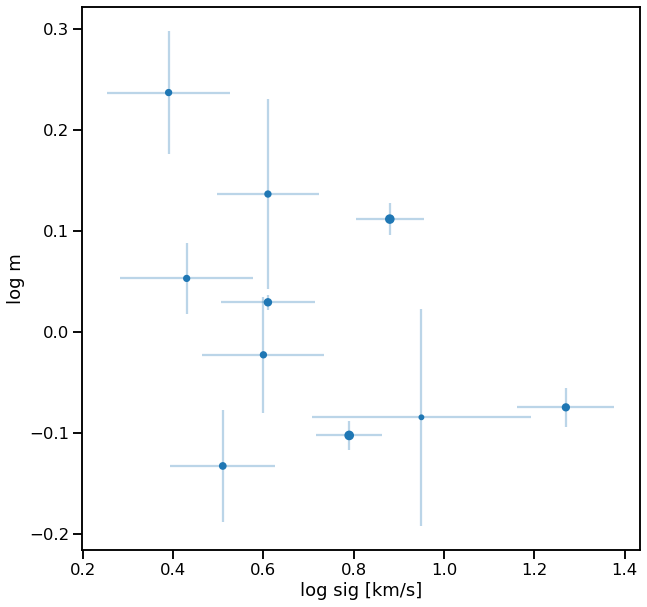

In [56]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
    xlabel=r"log sig [km/s]", ylabel=r"log m",
)
#ax.set_aspect("equal")
#sns.despine()

In [57]:
lm = linmix.LinMix(X, Y, Xe, Ye, K=2)

In [58]:
lm.run_mcmc()


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99513047 0.99887202 1.06218378 1.04340858 0.99541557 0.99615411]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99607308 0.99653625 1.00588284 1.01870525 0.99882781 1.00209497]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99738074 0.9983047  1.0061081  1.01462627 0.99984993 1.00501503]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99850866 0.99936317 1.00233202 1.02158796 0.99988128 0.99935586]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99918751 0.99960647 1.00011157 1.01673382 0.99989746 0.99841037]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00043126 1.00001179 0


Iteration:  5000
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00011736 1.00012801 1.00062942 1.00093252 0.99993567 0.99992095]


In [59]:
dfchain = pd.DataFrame.from_records(
    lm.chain.tolist(), 
    columns=lm.chain.dtype.names
)
dfchain

,alpha,beta,sigsqr,pi,mu,tausqr,mu0,usqr,wsqr,ximean,xisig,corr
0,0.230023,-0.365516,0.007499,"[0.991594412734357, 0.008405587265643001]","[0.5988666899681626, 0.5227247633229528]","[0.2028183122987581, 0.06395364473203116]",0.438460,0.075369,0.041340,0.598227,0.449110,-0.884480
1,0.162230,-0.282481,0.017390,"[0.9999026873166483, 9.731268335165009e-05]","[0.6976797809429662, -0.22105456670852985]","[0.030455562370254163, 0.3691219187270109]",0.125340,0.101147,0.135007,0.697590,0.174845,-0.350744
2,0.187434,-0.225517,0.030824,"[0.9197946469426496, 0.08020535305735056]","[0.6795667098877152, 0.14028444063840897]","[0.0759232548438179, 0.05066904896246679]",0.310645,0.090659,0.084820,0.636313,0.308792,-0.368701
3,0.363543,-0.765257,0.155652,"[0.8336616928051674, 0.16633830719483259]","[0.5723493349331961, 0.43453002447757855]","[0.08031384876554067, 1.034348746868289]",0.611142,0.052931,0.362275,0.549425,0.491569,-0.690075
4,0.838488,-1.039347,0.041552,"[0.8081095265542961, 0.19189047344570395]","[0.769687321489298, 1.1078154827408415]","[0.14178002589017968, 0.6421625886484214]",1.016304,0.057986,0.075087,0.834571,0.505498,-0.932288
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.450534,-0.613346,0.029198,"[0.9134799480343528, 0.08652005196564719]","[0.7022205638303477, 1.0137582509238836]","[0.059140469230621814, 0.23616779041846764]",0.785865,0.036851,0.087297,0.729175,0.286579,-0.717028
9996,0.276137,-0.260448,0.045026,"[0.9239772015019961, 0.07602279849800392]","[0.7845213463078662, 0.6496374866845217]","[0.03638574675961202, 0.15023685972878476]",0.816022,0.102805,0.166983,0.774267,0.215219,-0.255400
9997,0.003357,-0.061369,0.012938,"[0.8748662482305081, 0.12513375176949193]","[0.7337300262998352, 0.8869347184995336]","[0.06414543987209079, 0.1404897470730362]",1.025118,0.035182,0.127625,0.752901,0.276167,-0.147373
9998,0.230830,-0.275077,0.006674,"[0.8884769695916368, 0.11152303040836312]","[0.9776547671245613, 1.0302824894292255]","[0.23178521914571523, 0.2627553305301697]",0.746081,0.037054,0.060312,0.983524,0.485297,-0.852948


In [60]:
dfchain.describe()

,alpha,beta,sigsqr,mu0,usqr,wsqr,ximean,xisig,corr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.151105,-0.193763,0.024824,0.707927,0.043691,0.074162,0.699343,0.383519,-0.324956
std,0.196248,0.263877,0.028055,0.199185,0.029970,0.078245,0.097856,2.446280,0.363239
min,-1.140321,-2.012088,0.002045,-0.365222,0.000076,0.000141,0.177977,0.073047,-0.999998
25%,0.040137,-0.336180,0.010734,0.591474,0.018063,0.022844,0.638016,0.217828,-0.606824
50%,0.146261,-0.187805,0.017292,0.705225,0.038182,0.049112,0.698297,0.272478,-0.370842
75%,0.258015,-0.046990,0.028602,0.822001,0.065972,0.098463,0.760091,0.350729,-0.090465
max,1.551338,1.566116,0.637069,1.791261,0.109840,0.914613,1.269537,204.607205,0.997703


In [61]:
pearsonr(X, Y)

(-0.43940134032592654, 0.2038798815792879)

In [62]:
pd.DataFrame({"X": X, "Xe": Xe, "Y": Y, "Ye": Ye}).describe()

,X,Xe,Y,Ye
count,10.000000,10.000000,10.000000,10.000000
mean,0.704000,0.125147,0.014774,0.046610
std,0.270604,0.047929,0.120267,0.034507
min,0.390000,0.073739,-0.133063,0.007225
25%,0.532500,0.104907,-0.082397,0.016646
50%,0.610000,0.114571,0.003048,0.045160
75%,0.857500,0.135837,0.096806,0.059766
max,1.270000,0.242700,0.236839,0.107273


[Text(0, 0.5, 'log m'), Text(0.5, 0, 'log sig [km/s]')]

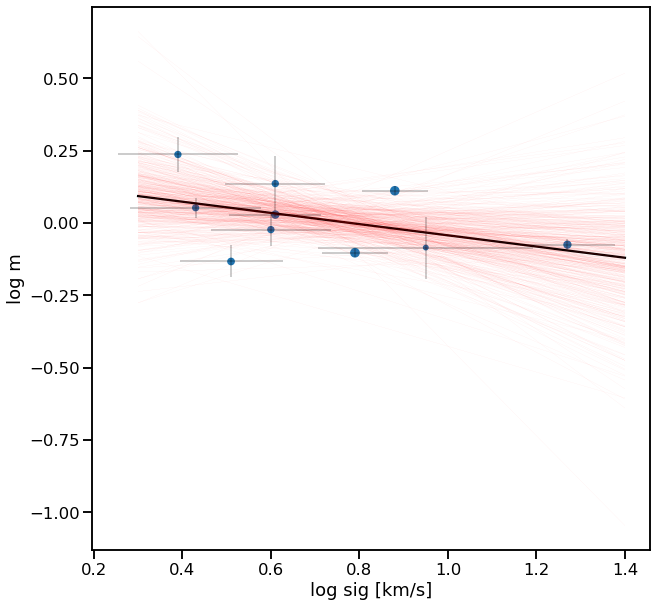

In [63]:
vmin, vmax = 0.3, 1.4
xgrid = np.linspace(vmin, vmax, 200)


fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", elinewidth=0.4, alpha=1.0, c="k")
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
# The original fit
ax.plot(xgrid, dfchain["alpha"].mean() + xgrid*dfchain["beta"].mean(), 
        '-', c="k")
for samp in lm.chain[::20]:
    ax.plot(xgrid, samp["alpha"] + xgrid*samp["beta"], 
        '-', c="r", alpha=0.2, lw=0.1)
    
ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
    xlabel=r"log sig [km/s]", ylabel=r"log m",
)

In [64]:
dfchain["alpha"].mean(),dfchain["beta"].mean()

(0.15110512281258062, -0.19376318171077409)

In [65]:
dfchain["alpha"].std(),dfchain["beta"].std()

(0.19624771321383436, 0.2638772031181759)

In [66]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      m   R-squared:                       0.128
Model:                            WLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.172
Date:                Wed, 10 Nov 2021   Prob (F-statistic):              0.311
Time:                        17:06:20   Log-Likelihood:                 6.5776
No. Observations:                  10   AIC:                            -9.155
Df Residuals:                       8   BIC:                            -8.550
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1006      0.085      1.

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Diam(R) vs r0

In [67]:
X, Y, Ye = [logdata[_] for _ in ['log L [pc]', 'log r0 [pc]', 'r0er']]

[Text(0, 0.5, 'log r0 [pc]'), Text(0.5, 0, 'log R [pc]')]

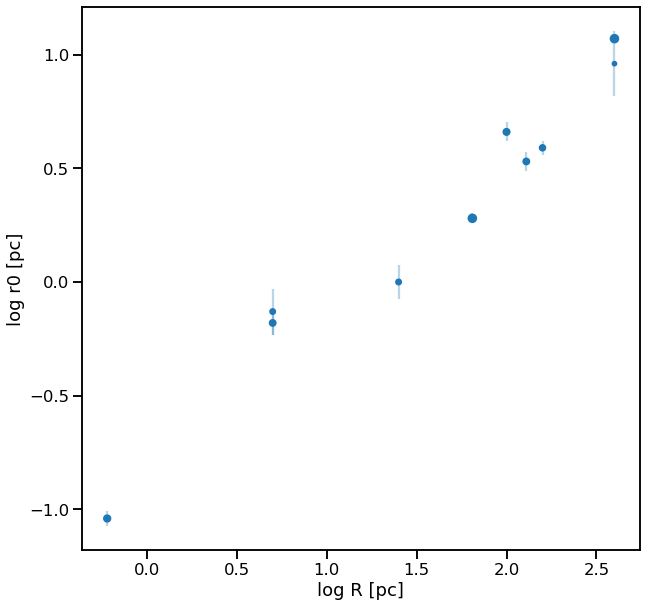

In [68]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
    xlabel=r"log R [pc]", ylabel=r"log r0 [pc]",
)
#ax.set_aspect("equal")
#sns.despine()

In [69]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:            log r0 [pc]   R-squared:                       0.972
Model:                            WLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     281.1
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           1.62e-07
Time:                        17:06:21   Log-Likelihood:                 4.7608
No. Observations:                  10   AIC:                            -5.522
Df Residuals:                       8   BIC:                            -4.916
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9062      0.091     -9.958      0.0

L vs sig

In [70]:
X, Y, Ye = [logdata[_] for _ in ['log L(H) [erg s^-1]', 'log sig [km/s]', 'siger']]

[Text(0, 0.5, 'log sig [km/s]'), Text(0.5, 0, 'log L(H) [erg s^-1]')]

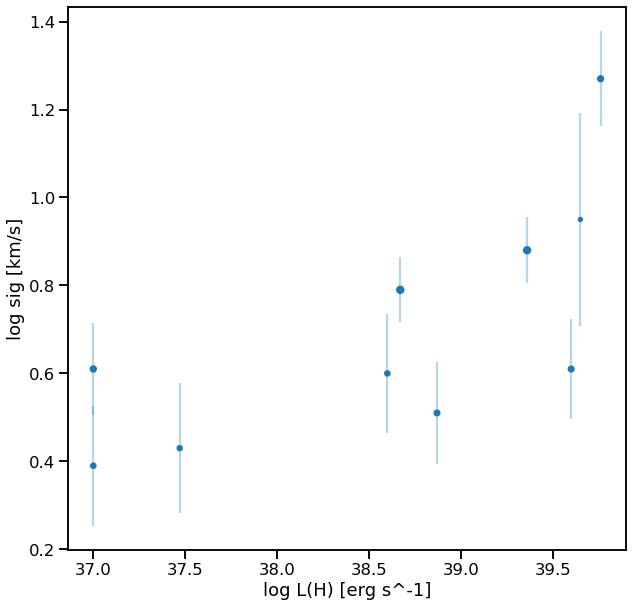

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
    xlabel=r"log L(H) [erg s^-1]", ylabel=r"log sig [km/s]",
)
#ax.set_aspect("equal")
#sns.despine()

In [72]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:         log sig [km/s]   R-squared:                       0.449
Model:                            WLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     6.509
Date:                Wed, 10 Nov 2021   Prob (F-statistic):             0.0341
Time:                        17:06:21   Log-Likelihood:                 2.3110
No. Observations:                  10   AIC:                           -0.6221
Df Residuals:                       8   BIC:                          -0.01690
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.8046    

In [73]:
X, Y, Ye = [logdata[_] for _ in ['log L(H) [erg s^-1]', 'log sig [km/s]', 'siger']]

In [74]:
x,y=Y,X
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     log L(H) [erg s^-1]   R-squared:                       0.506
Model:                             OLS   Adj. R-squared:                  0.444
Method:                  Least Squares   F-statistic:                     8.184
Date:                 Wed, 10 Nov 2021   Prob (F-statistic):             0.0211
Time:                         17:06:22   Log-Likelihood:                -10.911
No. Observations:                   10   AIC:                             25.82
Df Residuals:                        8   BIC:                             26.43
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             36.5997      0.7

Distance (D) vs m

In [75]:
X, Y, Ye = [logdata[_] for _ in ['log Dist [kpc]', 'm', 'mer']]

[Text(0, 0.5, 'log m'), Text(0.5, 0, 'log Dist [kpc]')]

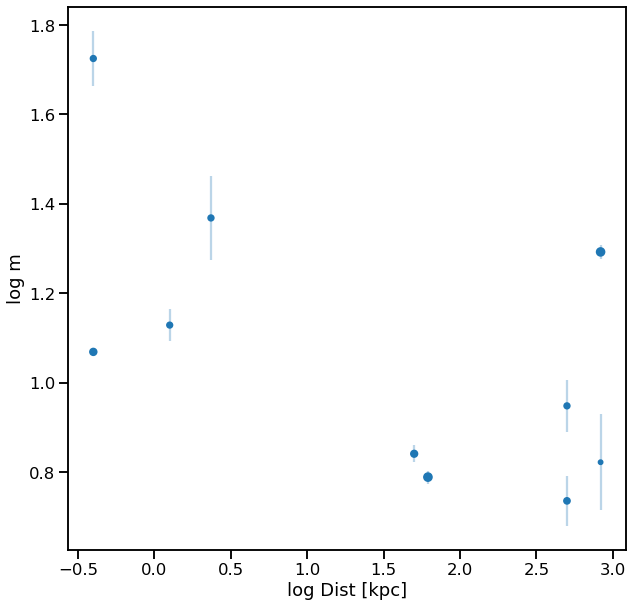

In [76]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
    xlabel=r"log Dist [kpc]", ylabel=r"log m",
)
#ax.set_aspect("equal")
#sns.despine()

In [77]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      m   R-squared:                       0.012
Model:                            WLS   Adj. R-squared:                 -0.112
Method:                 Least Squares   F-statistic:                   0.09675
Date:                Wed, 10 Nov 2021   Prob (F-statistic):              0.764
Time:                        17:06:22   Log-Likelihood:                -2.6729
No. Observations:                  10   AIC:                             9.346
Df Residuals:                       8   BIC:                             9.951
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0479      0.063     16.

sig vs siglos

In [78]:
X, Y, Ye = [logdata[_] for _ in ['log siglos [km/s]', 'log sig [km/s]', 'siger']]

[Text(0, 0.5, 'log sig [km/s]'), Text(0.5, 0, 'log siglos [km/s]')]

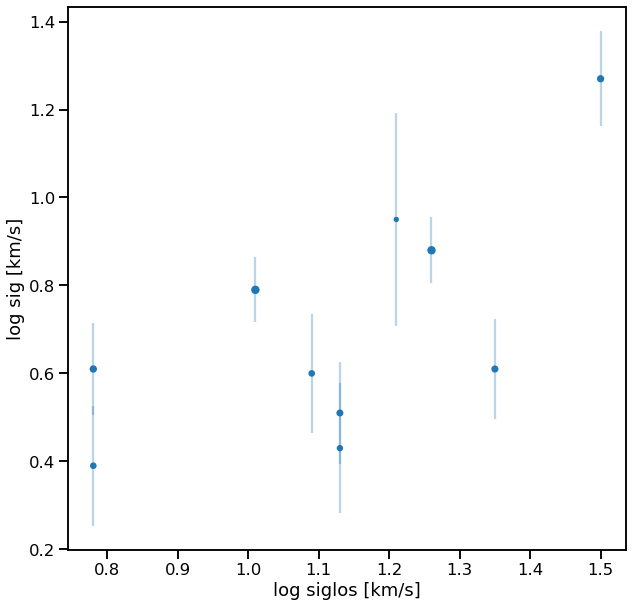

In [79]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
    xlabel=r"log siglos [km/s]", ylabel=r"log sig [km/s]",
)
#ax.set_aspect("equal")
#sns.despine()

In [80]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:         log sig [km/s]   R-squared:                       0.423
Model:                            WLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     5.859
Date:                Wed, 10 Nov 2021   Prob (F-statistic):             0.0418
Time:                        17:06:23   Log-Likelihood:                 2.0819
No. Observations:                  10   AIC:                           -0.1639
Df Residuals:                       8   BIC:                            0.4413
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0638      0.34

L vs siglos

In [81]:
Moiseev=pd.read_csv('DataOthers//Moiseev2015.csv')
Ostin=pd.read_csv('DataOthers//Ostin2001.csv')
Blasco=pd.read_csv('DataOthers//Blasco2013.csv')
Rozas=pd.read_csv('DataOthers//Rozas2006.csv')
Ars=pd.read_csv('DataOthers//ArsRoy1986.csv')
Wis=pd.read_csv('DataOthers//Wis2012.csv')
Gal=pd.read_csv('DataOthers//Gallagher1983.csv')
Fer=pd.read_csv('DataOthers//Fernandez2018.csv')


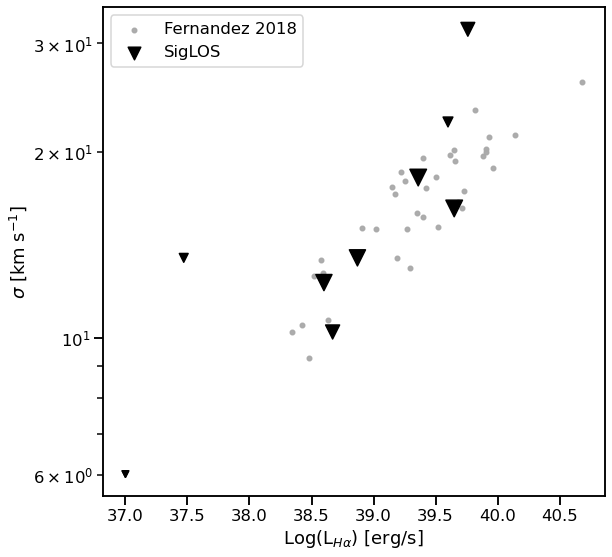

In [82]:
fig, ax=plt.subplots(figsize=(9,9))

plt.scatter(Fer.L,10**(Fer.sig),label='Fernandez 2018',marker='.',alpha=0.95,color='darkgray')

#plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log sig [km/s]']),marker='o',label='SigPOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)
plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log siglos [km/s]']),marker='v',label='SigLOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)

plt.yscale('log')

ax.set(
#    ylim  = [36, 43],
#    xlim  = [1, 150],
)
#ax.set_facecolor('whitesmoke')
ax.set(xlabel='Log(L$_{Hα}$) [erg/s]', ylabel='$σ$ [km s$^{-1}$]')
plt.legend()
#fig.savefig('SFplots//lvss.pdf', bbox_inches='tight')


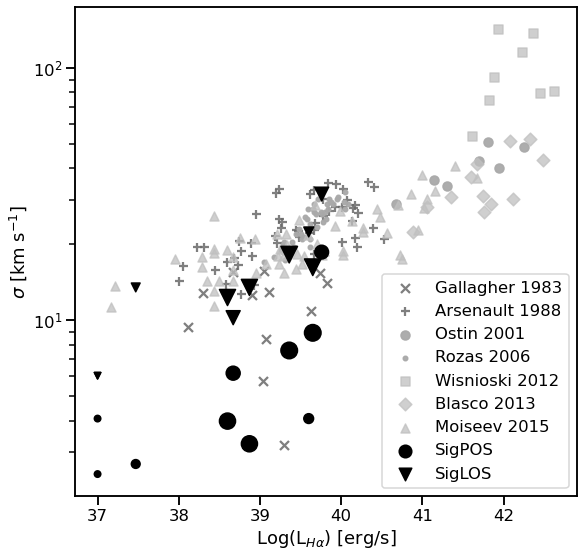

In [83]:
fig, ax=plt.subplots(figsize=(9,9))

plt.scatter(Gal.L,Gal.sig,label='Gallagher 1983',marker='x',alpha=0.85,color='dimgray')
plt.scatter(Ars.L,10**Ars.sig,label='Arsenault 1988',marker='+',alpha=0.85,color='dimgray')
plt.scatter(Ostin.L,Ostin.sig,label='Ostin 2001',marker='o',alpha=0.95,color='darkgray')
plt.scatter(Rozas.L,10**(Rozas.sig),label='Rozas 2006',marker='.',alpha=0.95,color='darkgray')
plt.scatter(Wis.L,Wis.sig,label='Wisnioski 2012',marker='s',alpha=0.75,color='silver')
plt.scatter(Blasco.L,Blasco.sig,label='Blasco 2013',marker='D',alpha=0.75,color='silver')
plt.scatter(Moiseev.L,Moiseev.sig,label='Moiseev 2015',marker='^',alpha=0.75,color='silver')

plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log sig [km/s]']),marker='o',label='SigPOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)
plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log siglos [km/s]']),marker='v',label='SigLOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)

plt.yscale('log')

ax.set(
#    ylim  = [36, 43],
#    xlim  = [1, 150],
)
#ax.set_facecolor('whitesmoke')
ax.set(xlabel='Log(L$_{Hα}$) [erg/s]', ylabel='$σ$ [km s$^{-1}$]')
plt.legend()
#fig.savefig('SFplots//lvss.pdf', bbox_inches='tight')


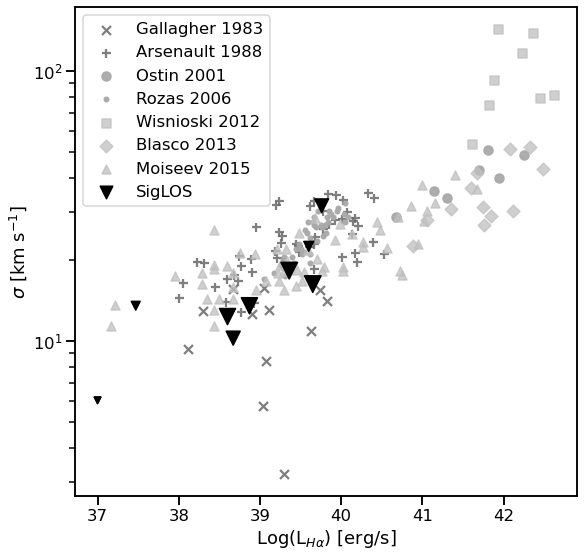

In [84]:
fig, ax=plt.subplots(figsize=(9,9))

plt.scatter(Gal.L,Gal.sig,label='Gallagher 1983',marker='x',alpha=0.85,color='dimgray')
plt.scatter(Ars.L,10**Ars.sig,label='Arsenault 1988',marker='+',alpha=0.85,color='dimgray')
plt.scatter(Ostin.L,Ostin.sig,label='Ostin 2001',marker='o',alpha=0.95,color='darkgray')
plt.scatter(Rozas.L,10**(Rozas.sig),label='Rozas 2006',marker='.',alpha=0.95,color='darkgray')
plt.scatter(Wis.L,Wis.sig,label='Wisnioski 2012',marker='s',alpha=0.75,color='silver')
plt.scatter(Blasco.L,Blasco.sig,label='Blasco 2013',marker='D',alpha=0.75,color='silver')
plt.scatter(Moiseev.L,Moiseev.sig,label='Moiseev 2015',marker='^',alpha=0.75,color='silver')

#plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log sig [km/s]']),marker='o',label='SigPOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)
plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log siglos [km/s]']),marker='v',label='SigLOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)

plt.yscale('log')

ax.set(
#    ylim  = [36, 43],
#    xlim  = [1, 150],
)
#ax.set_facecolor('whitesmoke')
ax.set(xlabel='Log(L$_{Hα}$) [erg/s]', ylabel='$σ$ [km s$^{-1}$]')
plt.legend()
#fig.savefig('SFplots//lvss.pdf', bbox_inches='tight')

In [85]:
globalL= pd.concat([Moiseev.L, Ostin.L.dropna(),Blasco.L.dropna(),Rozas.L.dropna(),Ars.L.dropna(),Wis.L.dropna(),Gal.L.dropna()], axis=0)
globalS= pd.concat([Moiseev.sig, Ostin.sig.dropna(),Blasco.sig.dropna(),10**Rozas.sig.dropna(),10**Ars.sig.dropna(),Wis.sig.dropna(),Gal.sig.dropna()],  axis=0)
GL=np.concatenate((np.array(globalL), np.array(logdata['log L(H) [erg s^-1]'])))
GS=np.concatenate((np.array(globalS), np.array(10**(logdata['log siglos [km/s]']))))

[Text(0, 0.5, 'Log$σ$ [km s$^{-1}$]'), Text(0.5, 0, 'Log(L$_{Hα}$) [erg/s]')]

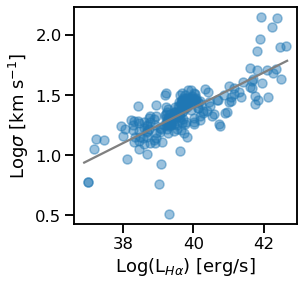

In [86]:
fig, ax=plt.subplots(figsize=(4,4))


plt.scatter(GL, np.log10(GS),alpha=0.45)

x2=np.logspace(1.567,1.63)
y2=-4.4928+0.1472*x2
plt.plot(x2,y2, color='gray')

ax.set(xlabel='Log(L$_{Hα}$) [erg/s]', ylabel='Log$σ$ [km s$^{-1}$]')


In [87]:
GSer = (GS*.05)/GS

In [88]:
GLer = (GL*.05)/GL

In [89]:
X, Xe, Y, Ye = [GL, GLer, np.log10(GS), GSer]

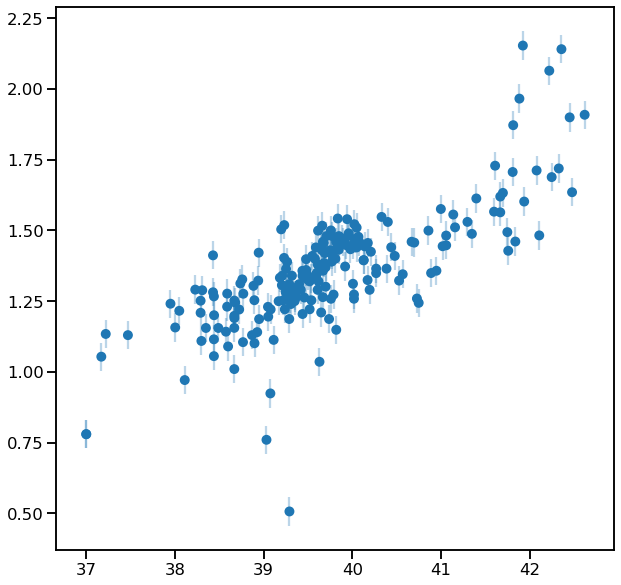

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
#plt.xscale('log')
#plt.yscale('log')

In [91]:
lm = linmix.LinMix(X, Y, Xe, Ye, K=2)

In [92]:
lm.run_mcmc()


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99481543 0.99464014 1.05579133 1.00333593 0.99137478 1.00928028]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99546804 0.99551794 1.01380811 1.00668608 0.99830657 1.00532787]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00017398 1.00021452 1.00628503 0.99901169 0.99912104 1.00640774]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.0008202  1.00078141 1.00525309 1.00762751 0.99947678 1.00642487]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00198993 1.00194012 1.00441312 1.0083017  0.9988083  1.00370663]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00261993 1.00254835 1


Iteration:  4800
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00008187 1.00007693 0.99999271 1.00299716 1.00002214 0.99987107]

Iteration:  4900
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00002096 1.00001741 1.00000094 1.00295544 0.9999873  0.99985093]

Iteration:  5000
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.0000395  1.00003818 1.00001713 1.00271468 0.9999787  0.99987965]


In [93]:
dfchain = pd.DataFrame.from_records(
    lm.chain.tolist(), 
    columns=lm.chain.dtype.names
)
dfchain

,alpha,beta,sigsqr,pi,mu,tausqr,mu0,usqr,wsqr,ximean,xisig,corr
0,-4.561585,0.148629,0.012059,"[0.3510248943191624, 0.6489751056808376]","[39.60164120320609, 39.772405621283326]","[0.0701556908216489, 2.1836507263415803]",39.667330,0.022725,0.100252,39.712463,1.203497,0.852216
1,-4.507906,0.147417,0.012657,"[0.35161569484559924, 0.6483843051544007]","[39.61016291157914, 39.73591498764193]","[0.10491348831204644, 1.573070101171505]",39.640394,0.045101,0.094126,39.691699,1.029781,0.803419
2,-4.946174,0.158908,0.014711,"[0.34515128799077216, 0.6548487120092279]","[39.64188617673036, 39.86990367452133]","[0.08421158510127083, 1.9257672864798954]",40.045583,0.066931,0.201780,39.791203,1.141010,0.831178
3,-4.391709,0.144583,0.013628,"[0.35896433950495765, 0.6410356604950425]","[39.721748574639506, 39.73103270020711]","[0.1548596889489202, 1.7304137782037972]",39.972446,0.128404,0.503621,39.727700,1.079290,0.800727
4,-4.603495,0.150329,0.015462,"[0.35810303044741126, 0.6418969695525888]","[39.655077192303835, 39.902620289992626]","[0.13408148033086906, 1.984126422812898]",40.124803,0.662824,0.351631,39.813974,1.155727,0.813183
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-4.154827,0.138698,0.014870,"[0.39703478952637233, 0.6029652104736277]","[39.5312952182784, 39.81943387543924]","[0.09790185556833583, 1.8533615174689984]",39.230753,0.347907,0.869902,39.705033,1.084555,0.776812
9996,-4.628384,0.150476,0.015227,"[0.3473945669576226, 0.6526054330423774]","[39.53585495895256, 39.73296197021592]","[0.08294241255419688, 2.164893275792659]",39.915202,1.524793,0.327002,39.664488,1.204343,0.826576
9997,-4.752115,0.153705,0.018399,"[0.3796540274303696, 0.6203459725696304]","[39.49390326671689, 39.921635910706534]","[0.09679697228500257, 1.642812429914921]",39.403497,0.525949,0.035688,39.759245,1.048308,0.765016
9998,-4.315390,0.142888,0.015476,"[0.4063328925916855, 0.5936671074083145]","[39.509348949302336, 39.97209969608032]","[0.10672325606637227, 1.5784440683793977]",38.901317,0.468655,0.218241,39.784069,1.015919,0.759316


In [94]:
dfchain.describe()

,alpha,beta,sigsqr,mu0,usqr,wsqr,ximean,xisig,corr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-4.505051,0.147540,0.015466,39.792313,0.583760,0.699988,39.742112,1.110579,0.795092
std,0.335646,0.008436,0.001836,0.587962,0.463917,0.588996,0.077220,0.070452,0.030416
min,-5.913087,0.115359,0.009966,37.136428,0.003649,0.009199,39.448508,0.898540,0.656133
25%,-4.734560,0.141815,0.014182,39.465121,0.209188,0.282720,39.688820,1.061510,0.775529
50%,-4.504295,0.147491,0.015338,39.755258,0.445579,0.532934,39.741945,1.107358,0.796904
75%,-4.276297,0.153309,0.016600,40.081631,0.864344,0.940917,39.792790,1.154909,0.816600
max,-3.195025,0.182788,0.027626,43.289383,1.833809,7.051792,40.121519,1.507007,0.887718


In [95]:
pearsonr(X, Y)

(0.77510211505142, 3.80228362815389e-42)

In [96]:
pd.DataFrame({"X": X, "Xe": Xe, "Y": Y, "Ye": Ye}).describe()

,X,Xe,Y,Ye
count,204.000000,2.040000e+02,204.000000,2.040000e+02
mean,39.750147,5.000000e-02,1.359637,5.000000e-02
std,1.105695,4.879636e-17,0.210025,4.875989e-17
min,37.000000,5.000000e-02,0.506911,5.000000e-02
25%,39.156000,5.000000e-02,1.252489,5.000000e-02
50%,39.640500,5.000000e-02,1.349277,5.000000e-02
75%,40.148700,5.000000e-02,1.460000,5.000000e-02
max,42.622000,5.000000e-02,2.153357,5.000000e-02


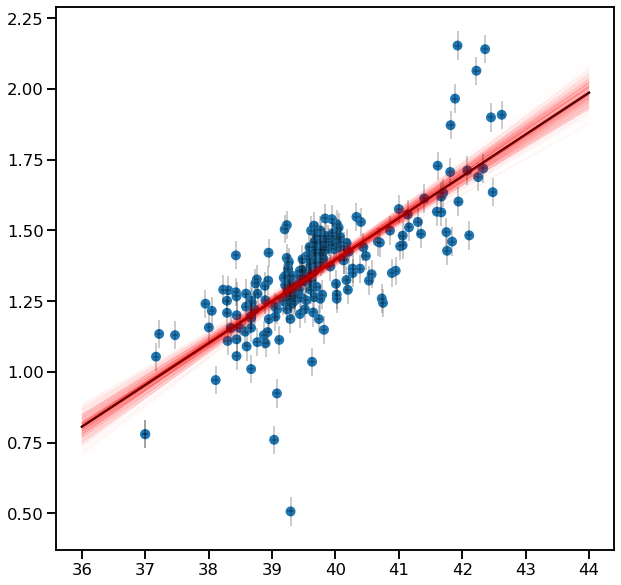

In [97]:
vmin, vmax = 36, 44
xgrid = np.linspace(vmin, vmax, 200)


fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", elinewidth=0.4, alpha=1.0, c="k")
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
# The original fit
ax.plot(xgrid, dfchain["alpha"].mean() + xgrid*dfchain["beta"].mean(), 
        '-', c="k")
for samp in lm.chain[::20]:
    ax.plot(xgrid, samp["alpha"] + xgrid*samp["beta"], 
        '-', c="r", alpha=0.2, lw=0.1)

In [98]:
dfchain["alpha"].mean(),dfchain["beta"].mean()

(-4.505050884471547, 0.14754018901818408)

In [99]:
dfchain["alpha"].std(),dfchain["beta"].std()

(0.3356462818438671, 0.008436326668057211)

In [100]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.601
Model:                            WLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     304.0
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           3.80e-42
Time:                        17:06:45   Log-Likelihood:                 123.05
No. Observations:                 204   AIC:                            -242.1
Df Residuals:                     202   BIC:                            -235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4928      0.336    -13.380      0.0

In [101]:
Y, Ye, X, Xe = [GL, GLer, np.log10(GS), GSer]

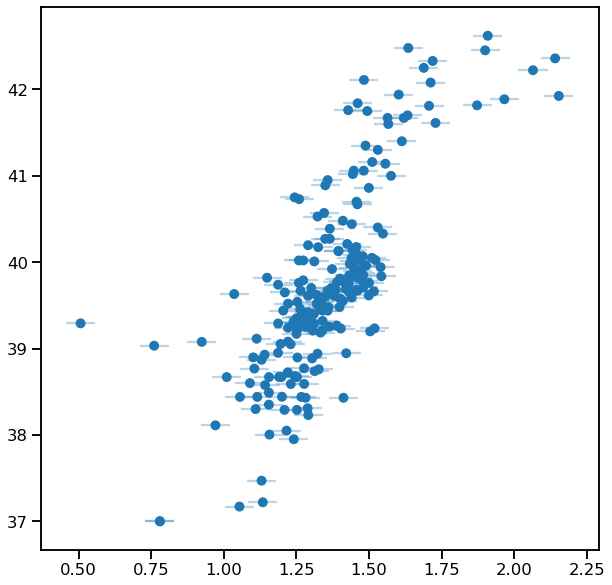

In [102]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

In [103]:
lm = linmix.LinMix(X, Y, Xe, Ye, K=2)

In [104]:
lm.run_mcmc()


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.992208   0.99233227 1.00175743 0.99404304 1.00792855 1.0005436 ]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99771062 0.99918623 1.01059941 0.99684548 1.0074196  1.01643517]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.9984167  0.99950591 1.00640887 1.0010261  1.0034506  1.01131606]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99787283 0.99820197 1.00411494 1.00087676 1.0011358  1.003189  ]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99863147 0.99861544 1.00402106 1.00229819 1.00189108 1.00413042]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00017456 0.99981084 1


Iteration:  4800
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99999584 0.99997799 1.00020465 0.99991762 1.00051539 1.00091072]

Iteration:  4900
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00002012 1.00000421 1.00011573 0.99995288 1.00048204 1.00081122]

Iteration:  5000
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00002495 1.0000173  1.0001838  0.99992761 1.00056703 1.00092251]


In [105]:
dfchain = pd.DataFrame.from_records(
    lm.chain.tolist(), 
    columns=lm.chain.dtype.names
)
dfchain

,alpha,beta,sigsqr,pi,mu,tausqr,mu0,usqr,wsqr,ximean,xisig,corr
0,33.826916,4.362386,0.481946,"[0.6353167239708263, 0.36468327602917355]","[1.3464315494135832, 1.3959616158113737]","[0.010872514763496058, 0.0886719608066557]",1.429705,0.009059,0.015807,1.364494,0.199532,0.781799
1,33.159317,4.853388,0.510381,"[0.637371371474681, 0.36262862852531885]","[1.354281657929979, 1.380625507470986]","[0.011815830096843961, 0.08891224534719569]",1.525395,0.017446,0.006691,1.363835,0.199834,0.805148
2,34.283473,4.030318,0.429441,"[0.656137355405502, 0.34386264459449795]","[1.3532160271034992, 1.3587948991436252]","[0.012568527969891654, 0.08248007127559184]",1.366049,0.003050,0.013132,1.355134,0.191352,0.762042
3,33.742379,4.415153,0.414470,"[0.7203094355118413, 0.27969056448815866]","[1.3562455821024308, 1.3465249670863324]","[0.01179414769065588, 0.12135536638611397]",1.352159,0.014392,0.046752,1.353527,0.206050,0.816281
4,33.549984,4.630890,0.467984,"[0.6529949769222946, 0.3470050230777055]","[1.325473557356471, 1.3810624432847802]","[0.015149858382649992, 0.10209479440461004]",1.409580,0.030773,0.032312,1.344763,0.214524,0.823613
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,33.767016,4.394266,0.401043,"[0.8398257188508138, 0.16017428114918617]","[1.3459581267652498, 1.421273587272535]","[0.017320212172033646, 0.12426417964166668]",1.410475,0.019350,0.045375,1.358022,0.187651,0.793097
9996,33.802721,4.362234,0.465221,"[0.7704184351815289, 0.22958156481847097]","[1.352473214273939, 1.38885972142016]","[0.013505309551234022, 0.14524996951381694]",1.196906,0.025767,0.024896,1.360827,0.209728,0.801717
9997,34.551863,3.865469,0.504928,"[0.7821871174870989, 0.21781288251290104]","[1.352534168136276, 1.4002226086814058]","[0.012628836237213649, 0.1151013786773448]",1.344918,0.006671,0.029759,1.362921,0.187979,0.714956
9998,33.633319,4.540516,0.601608,"[0.7782603294306937, 0.22173967056930632]","[1.3554460774885102, 1.4267249509277786]","[0.018183177244291266, 0.11801740438137533]",1.370313,0.020056,0.040949,1.371251,0.202971,0.765093


In [106]:
dfchain.describe()

,alpha,beta,sigsqr,mu0,usqr,wsqr,ximean,xisig,corr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,33.937309,4.275250,0.469679,1.375877,0.021979,0.035972,1.357938,0.208887,0.790463
std,0.353566,0.257200,0.052559,0.109160,0.016635,0.028930,0.014634,0.019769,0.036138
min,32.527045,3.354017,0.315626,0.732593,0.000161,0.000207,1.295950,0.149976,0.632942
25%,33.705221,4.106707,0.433045,1.314805,0.008600,0.015260,1.348079,0.194896,0.767410
50%,33.940350,4.271615,0.465985,1.373409,0.017177,0.028639,1.357902,0.207179,0.792406
75%,34.172453,4.444860,0.502124,1.438317,0.032474,0.048399,1.367648,0.220403,0.815071
max,35.142746,5.322838,0.738224,1.966454,0.066160,0.223388,1.422748,0.332080,0.903831


In [107]:
pearsonr(X, Y)

(0.77510211505142, 3.80228362815389e-42)

In [108]:
pd.DataFrame({"X": X, "Xe": Xe, "Y": Y, "Ye": Ye}).describe()

,X,Xe,Y,Ye
count,204.000000,2.040000e+02,204.000000,2.040000e+02
mean,1.359637,5.000000e-02,39.750147,5.000000e-02
std,0.210025,4.875989e-17,1.105695,4.879636e-17
min,0.506911,5.000000e-02,37.000000,5.000000e-02
25%,1.252489,5.000000e-02,39.156000,5.000000e-02
50%,1.349277,5.000000e-02,39.640500,5.000000e-02
75%,1.460000,5.000000e-02,40.148700,5.000000e-02
max,2.153357,5.000000e-02,42.622000,5.000000e-02


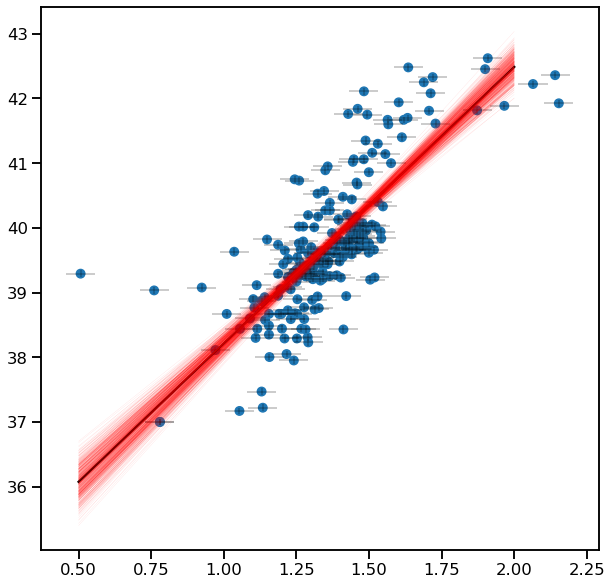

In [109]:
vmin, vmax = 0.5, 2
xgrid = np.linspace(vmin, vmax, 200)


fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", elinewidth=0.4, alpha=1.0, c="k")
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
# The original fit
ax.plot(xgrid, dfchain["alpha"].mean() + xgrid*dfchain["beta"].mean(), 
        '-', c="k")
for samp in lm.chain[::20]:
    ax.plot(xgrid, samp["alpha"] + xgrid*samp["beta"], 
        '-', c="r", alpha=0.4, lw=0.1)


In [110]:
dfchain["alpha"].mean(),dfchain["beta"].mean()

(33.93730860796667, 4.275249777626931)

In [111]:
dfchain["alpha"].std(),dfchain["beta"].std()

(0.35356589938417204, 0.2572000304331471)

In [112]:
print("--- %s seconds ---" % (time.time()-start_time))


--- 87.70006537437439 seconds ---
